In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
data.isnull().sum()

,0
ID,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
data.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


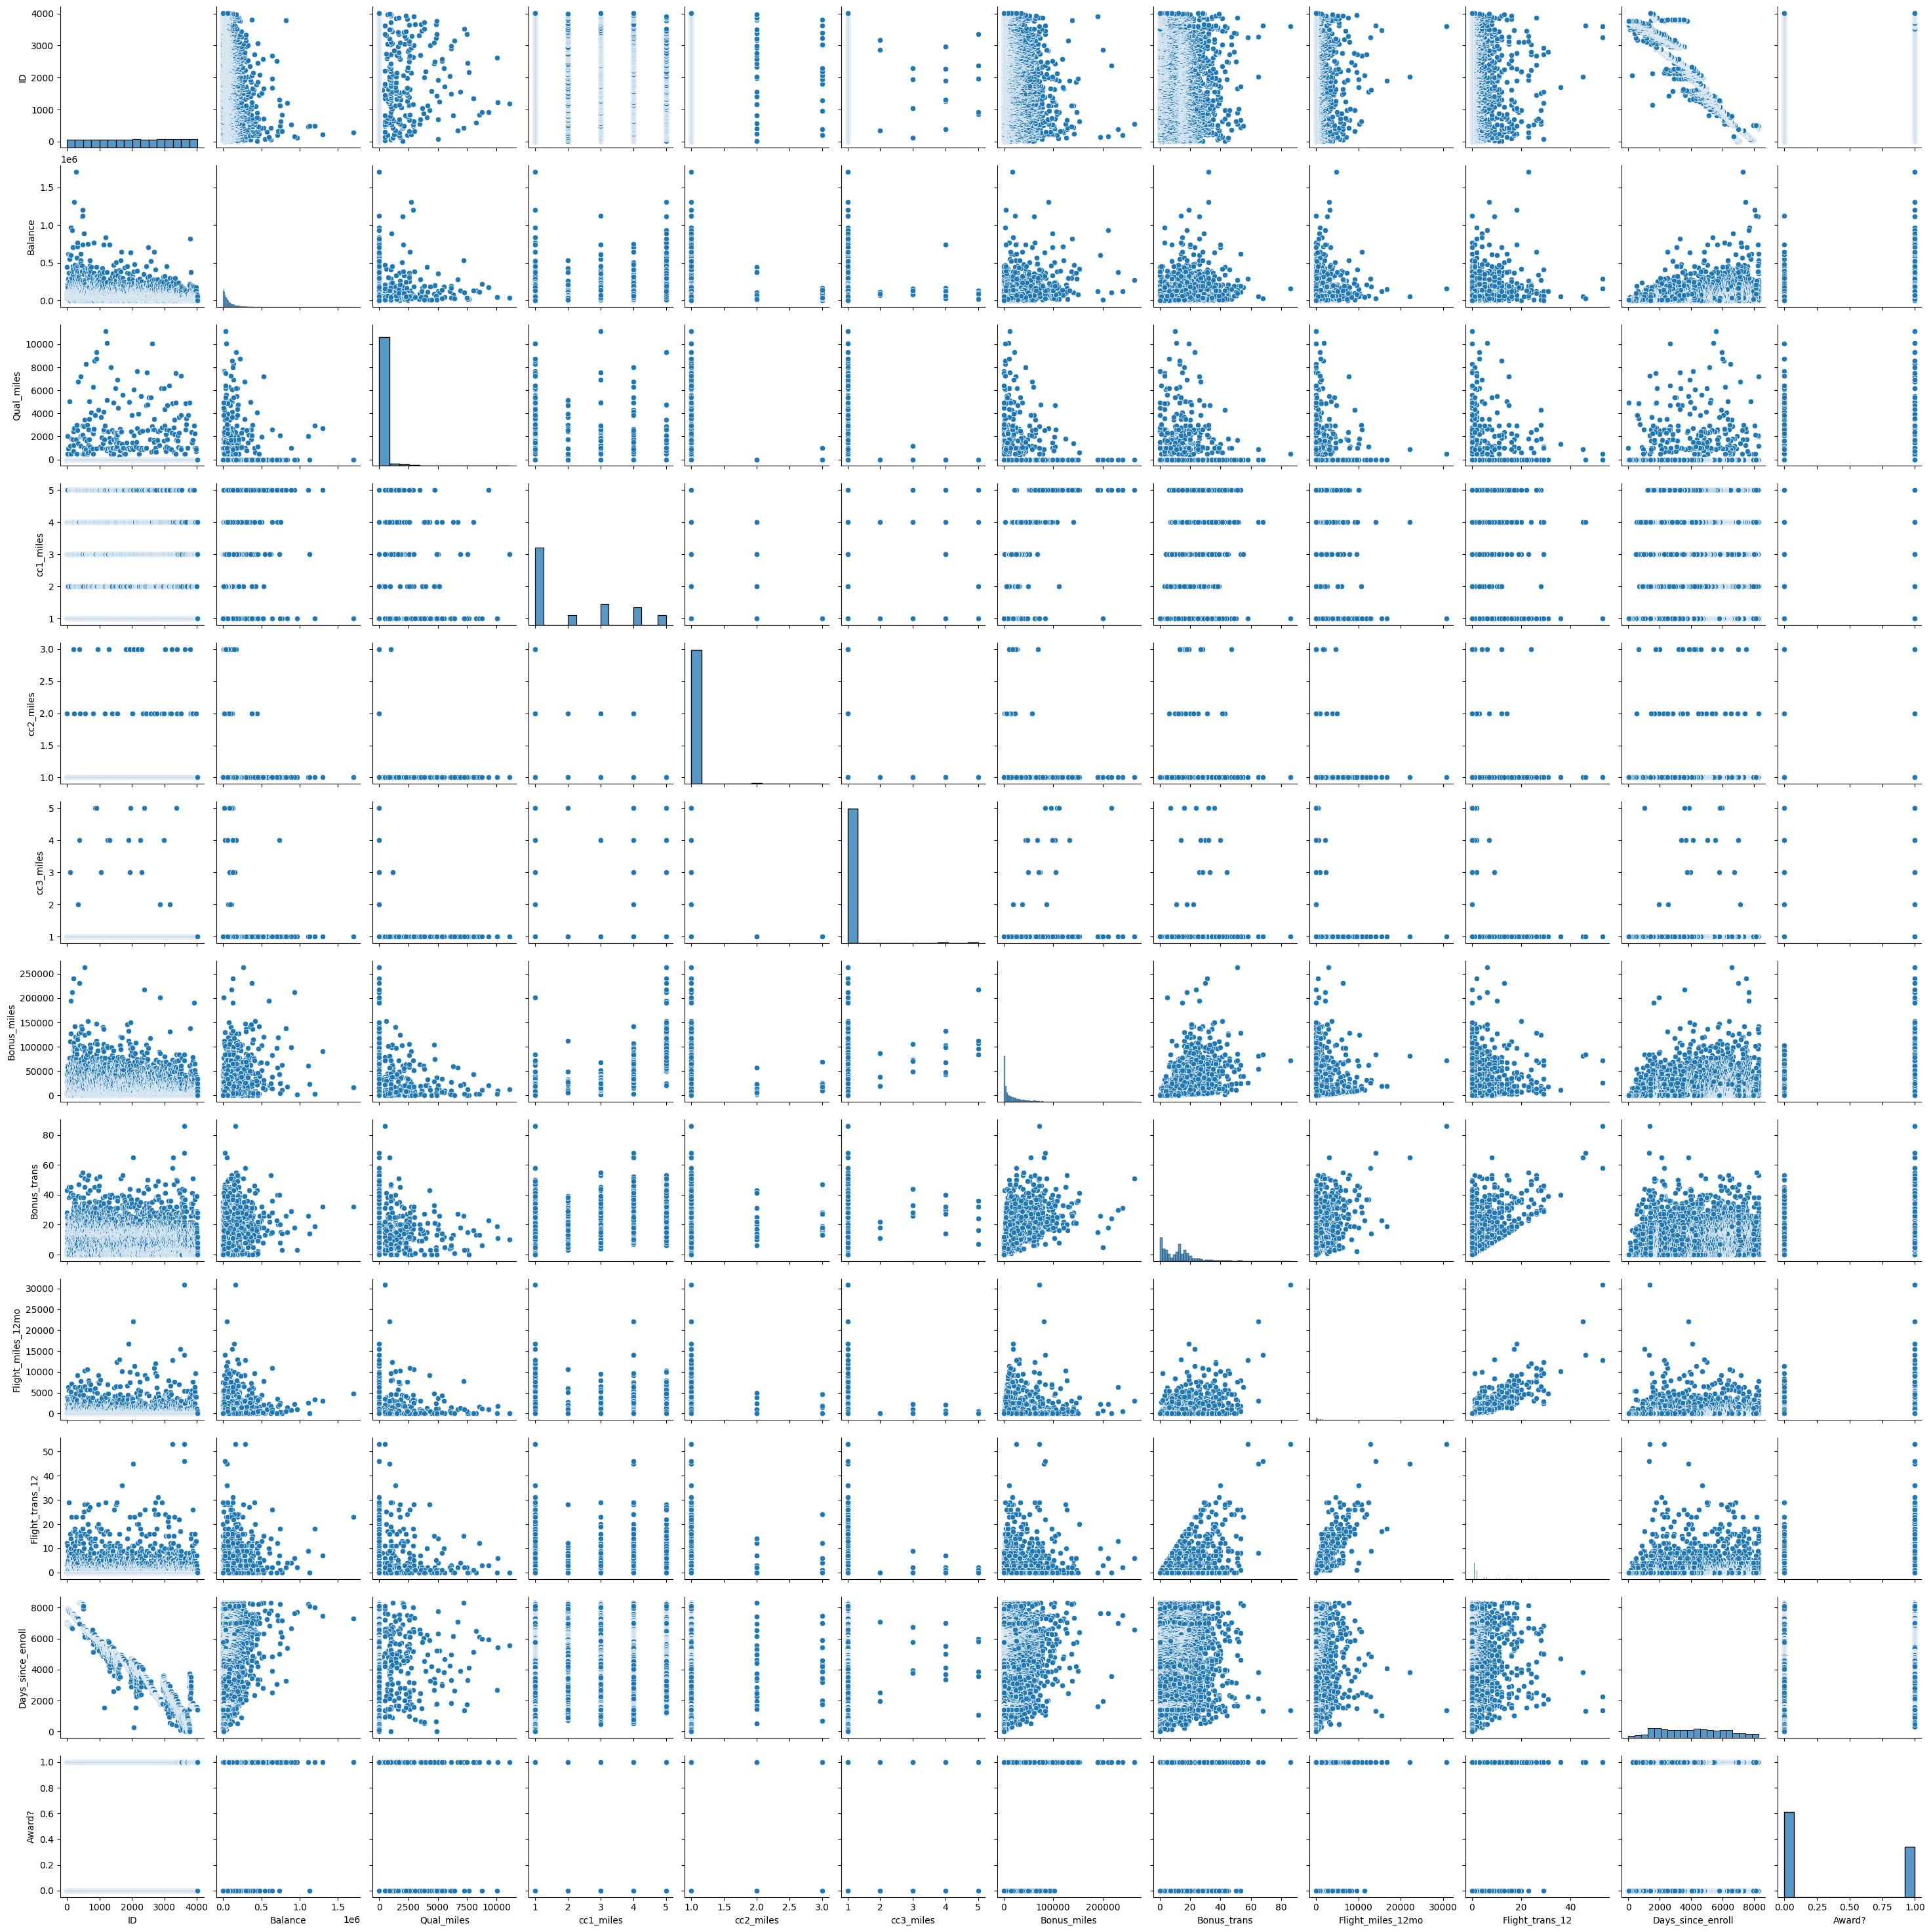

In [9]:
sns.pairplot(data)
plt.show()

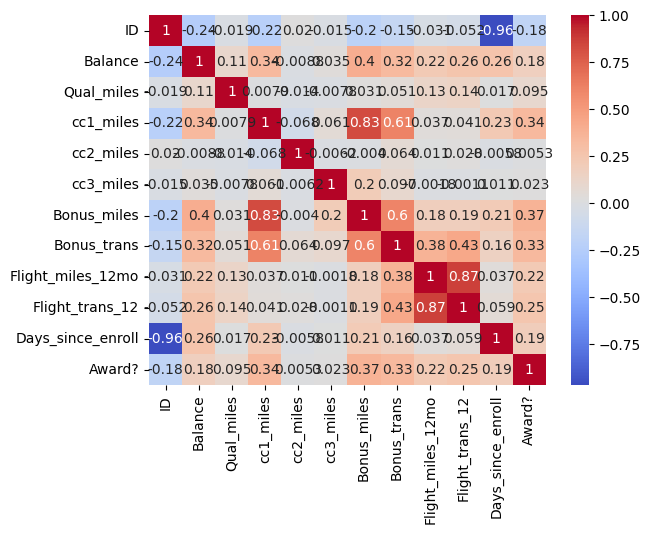

In [10]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

exclude_col = "ID"

# Initialize the scaler
scaler = StandardScaler()

# Standardize all columns except the excluded one
df_standardized = data.copy()
df_standardized.loc[:, data.columns != exclude_col] = scaler.fit_transform(data.loc[:, data.columns != exclude_col])

df_standardized.head()


<ipython-input-11-fffbe759203e>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-4.51140783e-01 -5.39456874e-01 -3.20031232e-01 ... -4.29480975e-05
 -1.85606976e-01 -7.00507951e-01]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_standardized.loc[:, data.columns != exclude_col] = scaler.fit_transform(data.loc[:, data.columns != exclude_col])
<ipython-input-11-fffbe759203e>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.18629869 -0.18629869 -0.18629869 ... -0.18629869 -0.18629869
 -0.18629869]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_standardized.loc[:, data.columns != exclude_col] = scaler.fit_transform(data.loc[:, data.columns != exclude_col])
<ipython-input-11-fffbe759203e>:10: FutureWarning: Setting an item of incompatible dtype is depr

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [12]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#df = scaler.fit_transform(data)  # Returns a NumPy array

# Convert back to DataFrame
#df = pd.DataFrame(df, columns=data.columns)
#df.head()

# **Hierarchical** **Clustering**

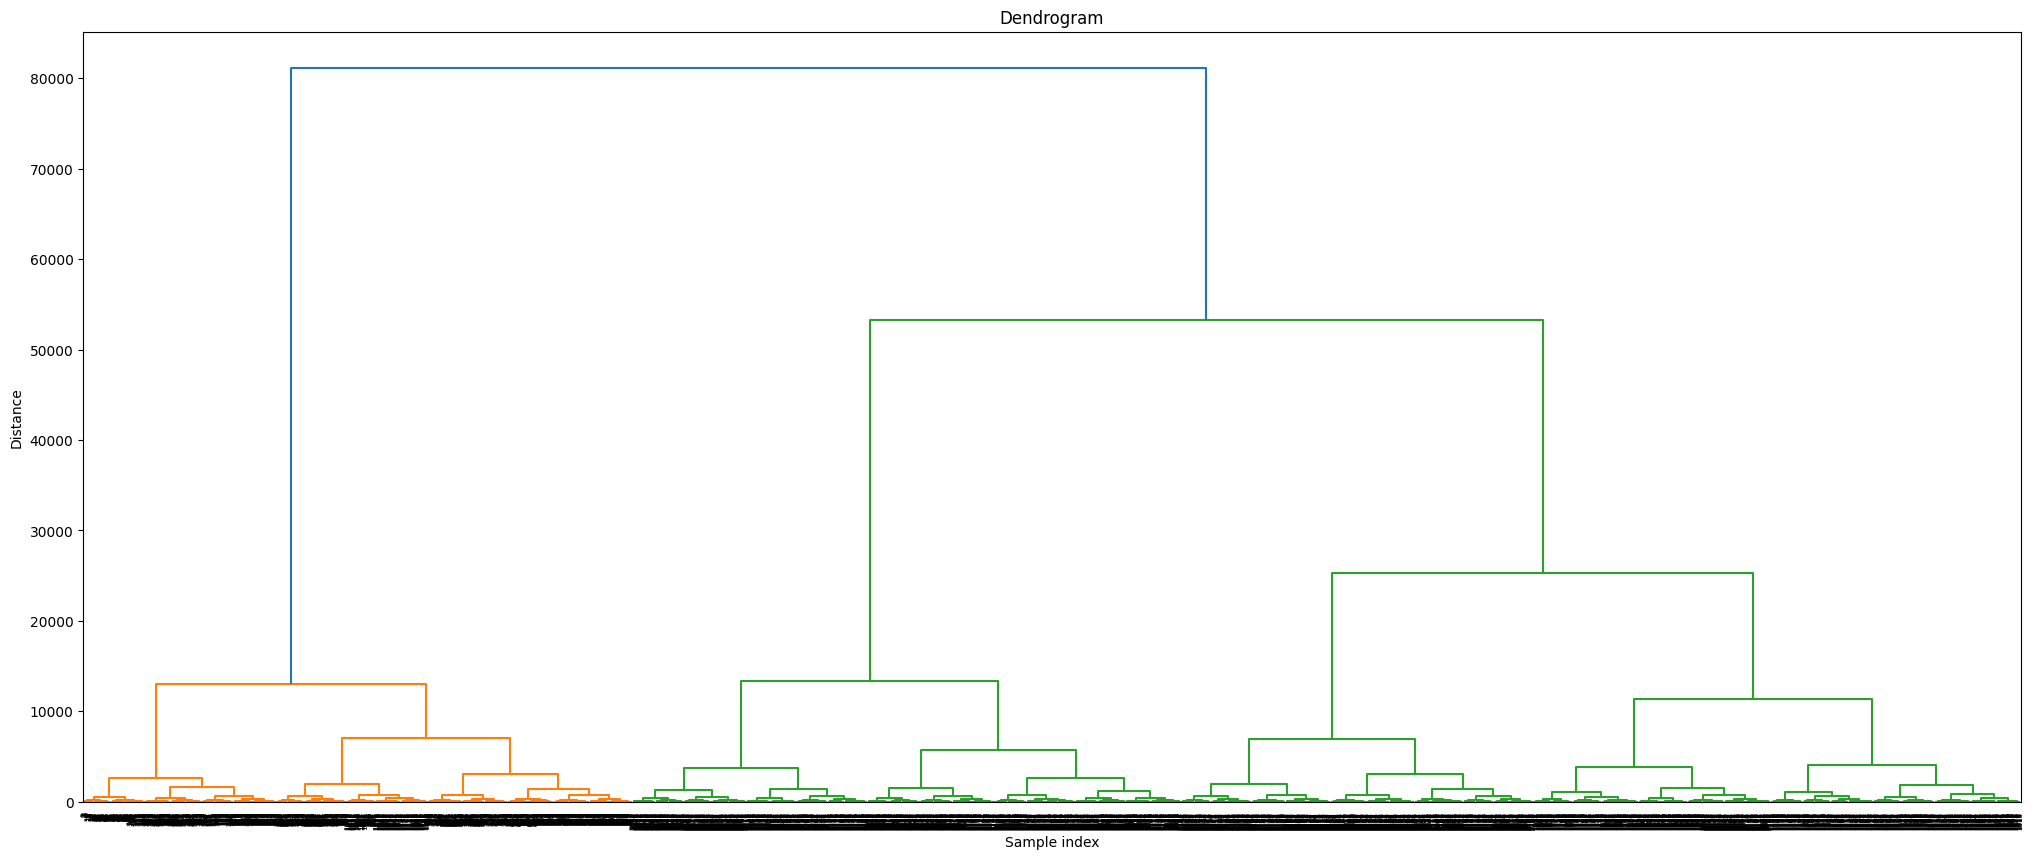

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(25, 10))
dendrogram = sch.dendrogram(sch.linkage(df_standardized, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [14]:
hc = AgglomerativeClustering(n_clusters=4, linkage="ward", metric='euclidean')

In [15]:
# Save Clusters for chart
y_hc = hc.fit_predict(df_standardized)
Clusters = pd.DataFrame(y_hc,columns=['Clusters'])


In [16]:
Clusters.tail()

,Clusters
3994,0
3995,0
3996,0
3997,0
3998,0


In [17]:
df_standardized['Cluster_id']=hc.labels_

In [18]:
df_standardized.sample(50)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id
731,741,-0.566967,-0.186299,1.409471,-0.098242,-0.062767,1.174930,0.041457,-0.328603,-0.362168,1.038048,1.303918,1
544,550,-0.443320,-0.186299,-0.769578,-0.098242,-0.062767,-0.440818,-0.791649,0.028531,-0.098503,1.082603,1.303918,1
1640,1656,-0.492416,-0.186299,-0.769578,-0.098242,-0.062767,-0.596649,0.249734,-0.328603,-0.362168,0.380866,-0.766919,2
2546,2565,-0.384529,-0.186299,-0.769578,-0.098242,-0.062767,-0.700467,-0.895788,-0.328603,-0.362168,-0.598854,-0.766919,3
1941,1958,-0.512661,-0.186299,1.409471,-0.098242,-0.062767,0.510029,0.145596,-0.328603,-0.362168,-0.105846,1.303918,2
3100,3122,-0.503521,-0.186299,-0.769578,-0.098242,-0.062767,-0.637522,-0.479234,-0.328603,-0.362168,-0.844389,-0.766919,0
604,612,0.389445,-0.186299,0.683121,-0.098242,-0.062767,-0.041736,0.249734,-0.328603,-0.362168,1.139749,1.303918,1
2483,2502,-0.582052,-0.186299,-0.769578,-0.098242,-0.062767,-0.699639,-1.104065,-0.150036,-0.098503,-0.493763,-0.766919,3
3863,3886,-0.570143,-0.186299,-0.769578,-0.098242,-0.062767,-0.456181,0.770426,0.028531,0.956155,-1.202764,1.303918,0
911,922,2.469681,-0.186299,1.409471,-0.098242,-0.062767,1.136583,1.186979,-0.150036,-0.098503,0.892276,1.303918,1


In [19]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data',index_col=0)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


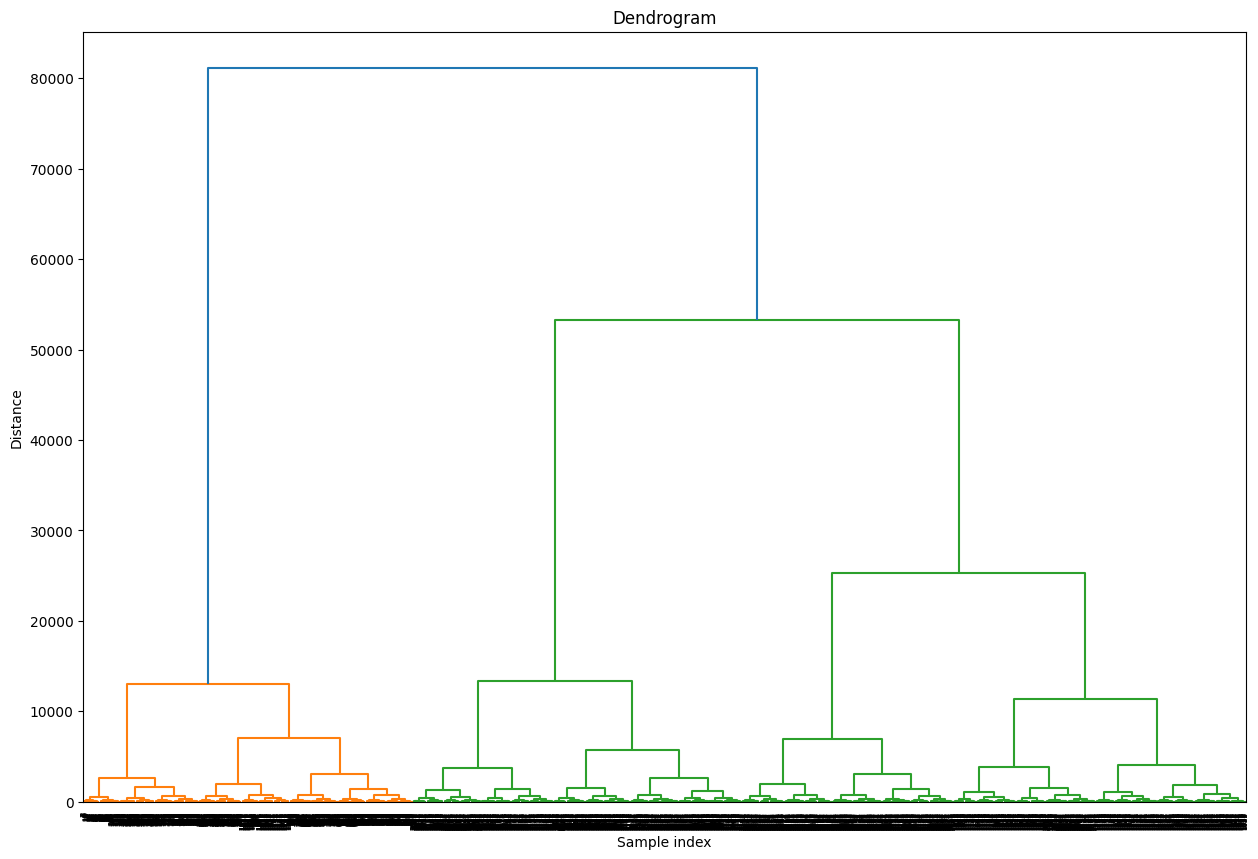

In [20]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(df_standardized, method = 'ward'),labels=data.index)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# **K_Means_Clustering**

In [21]:
from sklearn.cluster import KMeans

In [22]:
df_standardized.head()


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id
0,1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,1
1,2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,1
2,3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,1
3,4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,1
4,5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,1


In [23]:
df = df_standardized.drop(columns=['Cluster_id'])

df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [24]:
model = KMeans(n_clusters=4).fit(df)

In [25]:
model.inertia_

337367729.2516317

<function matplotlib.pyplot.show(close=None, block=None)>

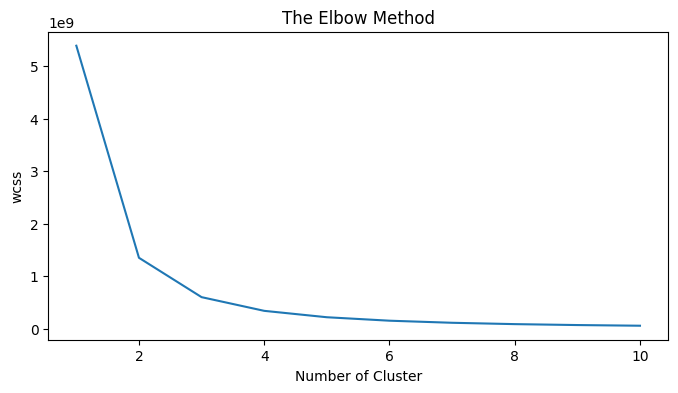

In [26]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster  import KMeans
fig = plt.figure(figsize=(8,4))
wcss = []
for i in range(1,11):
  model = KMeans(n_clusters=i).fit(df)
  wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Cluster")
plt.ylabel("wcss")
plt.show

In [27]:
clf = KMeans(n_clusters=3)
clf.fit(df)

KMeans(n_clusters=3)

In [28]:
y_names=clf.predict(df)

In [29]:
y_names

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [30]:
clf.cluster_centers_

array([[ 3.35000894e+03, -2.68982437e-01, -2.94488992e-02,
        -2.84623556e-01,  2.79430744e-02, -2.84128590e-02,
        -2.40331461e-01, -1.65655297e-01, -1.57356373e-02,
        -2.73807059e-02, -1.09803876e+00, -2.22205720e-01],
       [ 6.69018141e+02,  2.81073510e-01,  2.72177869e-02,
         2.42260337e-01, -2.65634878e-02,  2.24151833e-02,
         2.34257121e-01,  1.67242087e-01,  3.92098347e-02,
         7.32871697e-02,  1.15131225e+00,  1.78497046e-01],
       [ 2.00632684e+03, -8.16028795e-03,  2.63215191e-03,
         4.60677561e-02, -1.76620050e-03,  6.35290047e-03,
         9.44726439e-03,  7.85703329e-04, -2.30565113e-02,
        -4.51379447e-02, -3.71949726e-02,  4.65131061e-02]])

In [31]:
clf.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [32]:
clf.inertia_

598116977.2439821

In [33]:
md = pd.Series(y_names)
df["clust"]=md
df.sample(50)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
1480,1495,-0.426142,-0.186299,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,0.424936,-0.766919,2
3946,3969,0.649352,-0.186299,0.683121,-0.098242,-0.062767,0.100222,0.562149,0.492805,0.692490,-1.277345,-0.766919,0
3158,3180,0.558594,-0.186299,-0.769578,-0.098242,-0.062767,0.400247,-0.166819,0.249954,0.428826,-0.751890,1.303918,0
2028,2045,-0.533443,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,0.124676,1.303918,2
2793,2815,-0.684262,2.958871,-0.769578,-0.098242,-0.062767,-0.709992,-1.208203,-0.328603,-0.362168,-0.980475,-0.766919,0
2163,2180,-0.134229,-0.186299,1.409471,-0.098242,-0.062767,1.177622,-0.270958,-0.328603,-0.362168,-0.088896,-0.766919,2
943,954,-0.419621,-0.186299,-0.769578,-0.098242,-0.062767,-0.397253,-0.687511,-0.328603,-0.362168,0.868546,-0.766919,1
877,888,-0.517455,-0.186299,0.683121,-0.098242,-0.062767,0.979841,1.707671,-0.328603,-0.362168,0.916491,1.303918,1
247,251,-0.579382,-0.186299,-0.769578,-0.098242,-0.062767,-0.526746,-0.270958,-0.328603,-0.362168,1.570283,1.303918,1
2221,2239,-0.402770,-0.186299,-0.769578,-0.098242,-0.062767,-0.665723,-0.479234,-0.150036,-0.098503,-0.147495,-0.766919,2


In [34]:
df.iloc[:,1:].groupby(df.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,-0.268949,-0.029215,-0.285526,0.028131,-0.028362,-0.240873,-0.166198,-0.017682,-0.028849,-1.098507,-0.221393,0.0
1,0.279900,0.026895,0.240733,-0.026672,0.022287,0.232838,0.165402,0.038655,0.072630,1.150428,0.177070,1.0
2,-0.007852,0.002632,0.047701,-0.001766,0.006353,0.010689,0.002659,-0.020632,-0.043161,-0.039218,0.046513,2.0


In [35]:
plt.style.use('classic')
print(plt.style.available )

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Axes: xlabel='cc1_miles', ylabel='cc2_miles'>

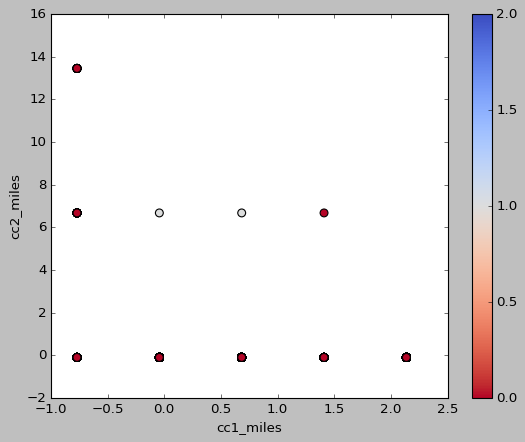

In [36]:
df.plot("cc1_miles","cc2_miles" , c=clf.labels_, kind="scatter",s = 50,cmap=plt.cm.coolwarm_r)

# **DBSCAN**

In [37]:
from  sklearn.cluster import  DBSCAN

In [38]:
data1 = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data1.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [39]:
data1.drop(['ID'],axis=1,inplace=True)

In [40]:
data1.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [42]:
array = data1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [43]:
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [44]:
dbscan =  DBSCAN(eps=10, min_samples=12)
dbscan.fit(x)

DBSCAN(eps=10, min_samples=12)

In [45]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [47]:
pd.concat([data1,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


<Axes: xlabel='Flight_miles_12mo', ylabel='cc2_miles'>

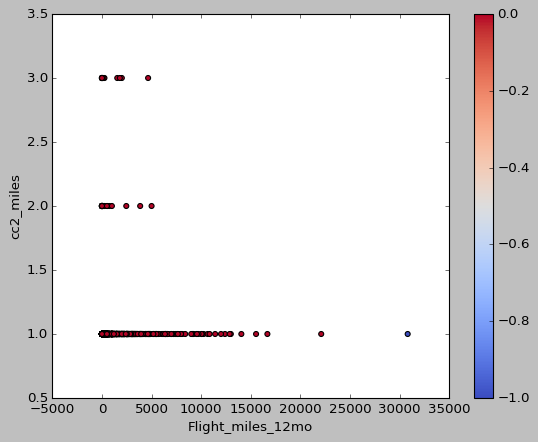

In [48]:
data1.plot(x='Flight_miles_12mo',y='cc2_miles',c=dbscan.labels_ ,kind="scatter",cmap="coolwarm")

In [49]:
import sklearn
sklearn.metrics.silhouette_score(x,dbscan.labels_)

0.8562820070415407

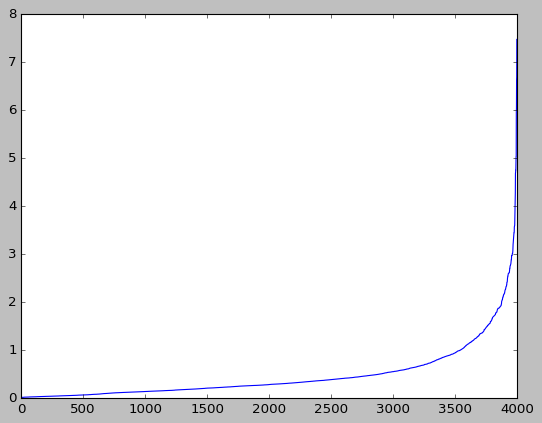

In [50]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(x)
distances,np.indices = nbrs.kneighbors(x)
distances = np.sort(distances,axis=0)

distances=distances[:,1]
plt.plot(distances)


#   Cluster Analysis and **Interpretation**

In [51]:
df12 = df.iloc[:,1:].groupby(df.clust)

In [52]:
df12.mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,-0.268949,-0.029215,-0.285526,0.028131,-0.028362,-0.240873,-0.166198,-0.017682,-0.028849,-1.098507,-0.221393,0.0
1,0.279900,0.026895,0.240733,-0.026672,0.022287,0.232838,0.165402,0.038655,0.072630,1.150428,0.177070,1.0
2,-0.007852,0.002632,0.047701,-0.001766,0.006353,0.010689,0.002659,-0.020632,-0.043161,-0.039218,0.046513,2.0


### Cluster 0: Moderate balance, low qualifying miles, and moderate bonus miles. Likely represents occasional travelers.

### Cluster 1: High balance, high qualifying miles, and high bonus miles. Likely represents frequent flyers.

### Cluster 2: Low balance, no qualifying miles, and low bonus miles. Likely represents infrequent or new customers.

# Visualize Clusters

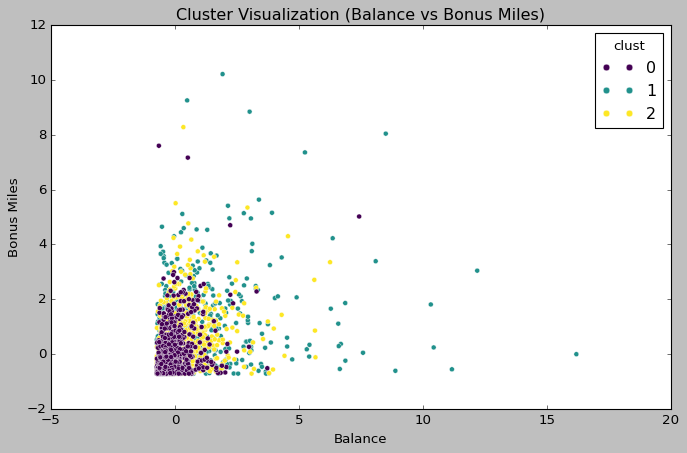

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of two features with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Balance'], y=df['Bonus_miles'], hue=df['clust'], palette='viridis')
plt.title('Cluster Visualization (Balance vs Bonus Miles)')
plt.xlabel('Balance')
plt.ylabel('Bonus Miles')
plt.show()

A scatter plot showing clusters with different colors.

Cluster 0 (blue): Moderate balance and bonus miles.

Cluster 1 (green): High balance and bonus miles.

Cluster 2 (orange): Low balance and bonus miles.

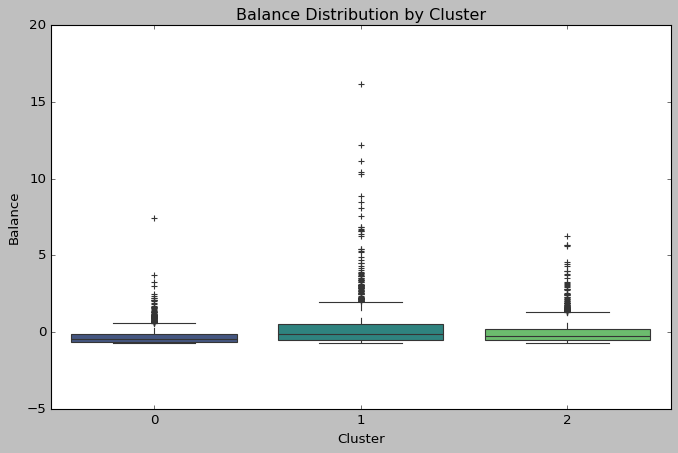

In [57]:
# Boxplot to compare clusters across a feature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['clust'], y=df['Balance'], palette='viridis')
plt.title('Balance Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Balance')
plt.show()

# Analyze Cluster Sizes

In [55]:
# Count the number of data points in each cluster
cluster_sizes = df['clust'].value_counts()

# Display cluster sizes
print(cluster_sizes)

clust
0    1340
2    1334
1    1325
Name: count, dtype: int64


# Insights

Cluster 1 (Frequent Flyers):

*   High-value customers who contribute significantly to revenue.
*   Focus on retention strategies, such as exclusive offers or loyalty programs.

Cluster 0 (Occasional Travelers):

*   Moderate-value customers with potential for growth.
*  Target with personalized promotions to increase engagement.

Cluster 2 (Infrequent Customers):

*   Low-value customers who may need re-engagement campaigns.
*   Consider offering discounts or incentives to encourage more frequent travel.




